# Credit Risk Modelling: Project
Antoni Ballaun, Laura Hoang, Jędrzej Joniec, Piotr Zambrzycki

## 03. Data preparation: data binning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('filled_missings_df.csv',index_col=0)

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Defaulted
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,0,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,MN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0


In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'LoanCurrentDaysDe

Column descriptions: https://docs.google.com/spreadsheets/d/1lTxLIwJU8rwVn1gsin3Q1w5btT1R1X-7oqGn5XDz-Xs/edit?usp=sharing

In [5]:
pointless_cols = ['ListingKey','ListingNumber', 'LoanNumber', 'LoanStatus', 'MemberKey',  ]

### Find the rest columns with no meaning

In [6]:
df = df.drop(pointless_cols,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114805 entries, 0 to 114804
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingCreationDate                 114805 non-null  object 
 1   Term                                114805 non-null  int64  
 2   BorrowerAPR                         114805 non-null  float64
 3   BorrowerRate                        114805 non-null  float64
 4   LenderYield                         114805 non-null  float64
 5   ListingCategory (numeric)           114805 non-null  int64  
 6   BorrowerState                       114805 non-null  object 
 7   EmploymentStatus                    114805 non-null  object 
 8   EmploymentStatusDuration            114805 non-null  float64
 9   IsBorrowerHomeowner                 114805 non-null  bool   
 10  CurrentlyInGroup                    114805 non-null  bool   
 11  DateCreditPulled               

### Bins for feature selection and LogReg

In [8]:
# Binning continous variables
continous_columns = ['DebtToIncomeRatio', 'LenderYield' ]

### First train test split, only fit on train and transform test based on bin edges

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=101)

### Add all continous  columns later if this works

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def continous_binning_tree(df, continuous_columns, target, n_bins=5, min_samples_leaf=0.1):
    bin_edges_dict = {}  # Dictionary to store bin edges for each column
    
    for col in continuous_columns:
        X = df[[col]]
        y = df[target]
        
        # min_samples
        min_leaf = max(1, int(min_samples_leaf * len(X)) if isinstance(min_samples_leaf, float) else min_samples_leaf)
        
        tree = DecisionTreeClassifier(
            max_leaf_nodes=n_bins,
            min_samples_leaf=min_leaf,
            random_state=42,
            criterion='gini'
        )
        tree.fit(X, y)
        
        # splits tresholds
        thresholds = []
        tree_ = tree.tree_
        for i in range(tree_.node_count):
            if (tree_.children_left[i] != tree_.children_right[i]) and (tree_.feature[i] == 0):
                thresholds.append(tree_.threshold[i])
        
        # check if enough splits made
        if len(thresholds) < n_bins - 1:
            print(f": Only {len(thresholds)+1} bins created for {col}.")
        
        # make_edges from -inf to +inf so it works with test_df
        thresholds_sorted = sorted(thresholds)
        bin_edges = [-float('inf')] + thresholds_sorted + [float('inf')]
        bin_edges_dict[col] = bin_edges
        
        # make_bins on train_Df
        new_col = f'{col}_binned'
        df[new_col] = pd.cut(df[col], 
                            bins=bin_edges, 
                            labels=[f"Bin_{i+1}" for i in range(len(bin_edges)-1)],
                            include_lowest=True)
        
        # bin info
        print(f"\nBinning for {col}:")
        print(df.groupby(new_col)[col].agg(['min', 'max']))
    
    return df, bin_edges_dict 

In [13]:
train_df, bin_edges_dict = continous_binning_tree(
    train_df, 
    continuous_columns=continous_columns, 
    target='Defaulted'
)

for col in bin_edges_dict:
    bin_edges = bin_edges_dict[col]
    new_col = f'{col}_binned'
    test_df[new_col] = pd.cut(test_df[col],
                             bins=bin_edges,
                             labels=[f"Bin_{i+1}" for i in range(len(bin_edges)-1)],
                             include_lowest=True)


Binning for DebtToIncomeRatio:
                              min       max
DebtToIncomeRatio_binned                   
Bin_1                     0.00000   0.05148
Bin_2                     0.05359   0.08632
Bin_3                     0.08858   0.49000
Bin_4                     0.50000   0.58000
Bin_5                     0.59000  10.01000

Binning for LenderYield:
                       min     max
LenderYield_binned                
Bin_1              -0.0100  0.1234
Bin_2               0.1235  0.2099
Bin_3               0.2100  0.2686
Bin_4               0.2687  0.3090
Bin_5               0.3095  0.3400


In [14]:
test_df['DebtToIncomeRatio_binned']

104644    Bin_3
51793     Bin_2
81387     Bin_3
31356     Bin_3
915       Bin_3
          ...  
113482    Bin_3
86124     Bin_3
38229     Bin_3
46742     Bin_3
31185     Bin_3
Name: DebtToIncomeRatio_binned, Length: 22961, dtype: category
Categories (5, object): ['Bin_1' < 'Bin_2' < 'Bin_3' < 'Bin_4' < 'Bin_5']

In [ ]:
np.unique(test_df['DebtToIncomeRatio_binned'], return_counts=True)

(array(['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5'], dtype=object),
 array([  787,  1142, 19881,   545,   606]))

<BarContainer object of 5 artists>

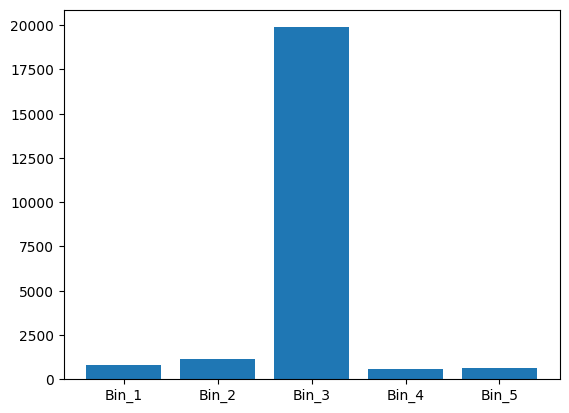

In [17]:
vals, counts = np.unique(test_df['DebtToIncomeRatio_binned'], return_counts=True)
plt.bar(x=vals, height=counts)


In [18]:
sum(test_df.Defaulted)

3408

In [19]:
default_counts_per_bin = test_df.groupby('DebtToIncomeRatio_binned')['Defaulted'].sum().reset_index()

total_counts_per_bin = test_df['DebtToIncomeRatio_binned'].value_counts().reset_index()
total_counts_per_bin.columns = ['DebtToIncomeRatio_binned', 'Total']

result = pd.merge(default_counts_per_bin, total_counts_per_bin, on='DebtToIncomeRatio_binned')

result['Default_Rate'] = result['Defaulted'] / result['Total']
result = result.sort_values('DebtToIncomeRatio_binned')
result

,DebtToIncomeRatio_binned,Defaulted,Total,Default_Rate
0,Bin_1,166,787,0.210928
1,Bin_2,181,1142,0.158494
2,Bin_3,2786,19881,0.140134
3,Bin_4,90,545,0.165138
4,Bin_5,185,606,0.305281


### Make functions for clustering discrete ordered and unordered variables

### WOE Transform after on all binned columns

### Than feature selection based on Gini maybe with gradient boost or RFC